## Data Preprocessing
 - 영상 데이터 전처리


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
!pip install missingno

In [4]:
import missingno as msno

In [5]:
tit = sns.load_dataset('titanic')
df = pd.DataFrame(tit)
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

<Axes: >

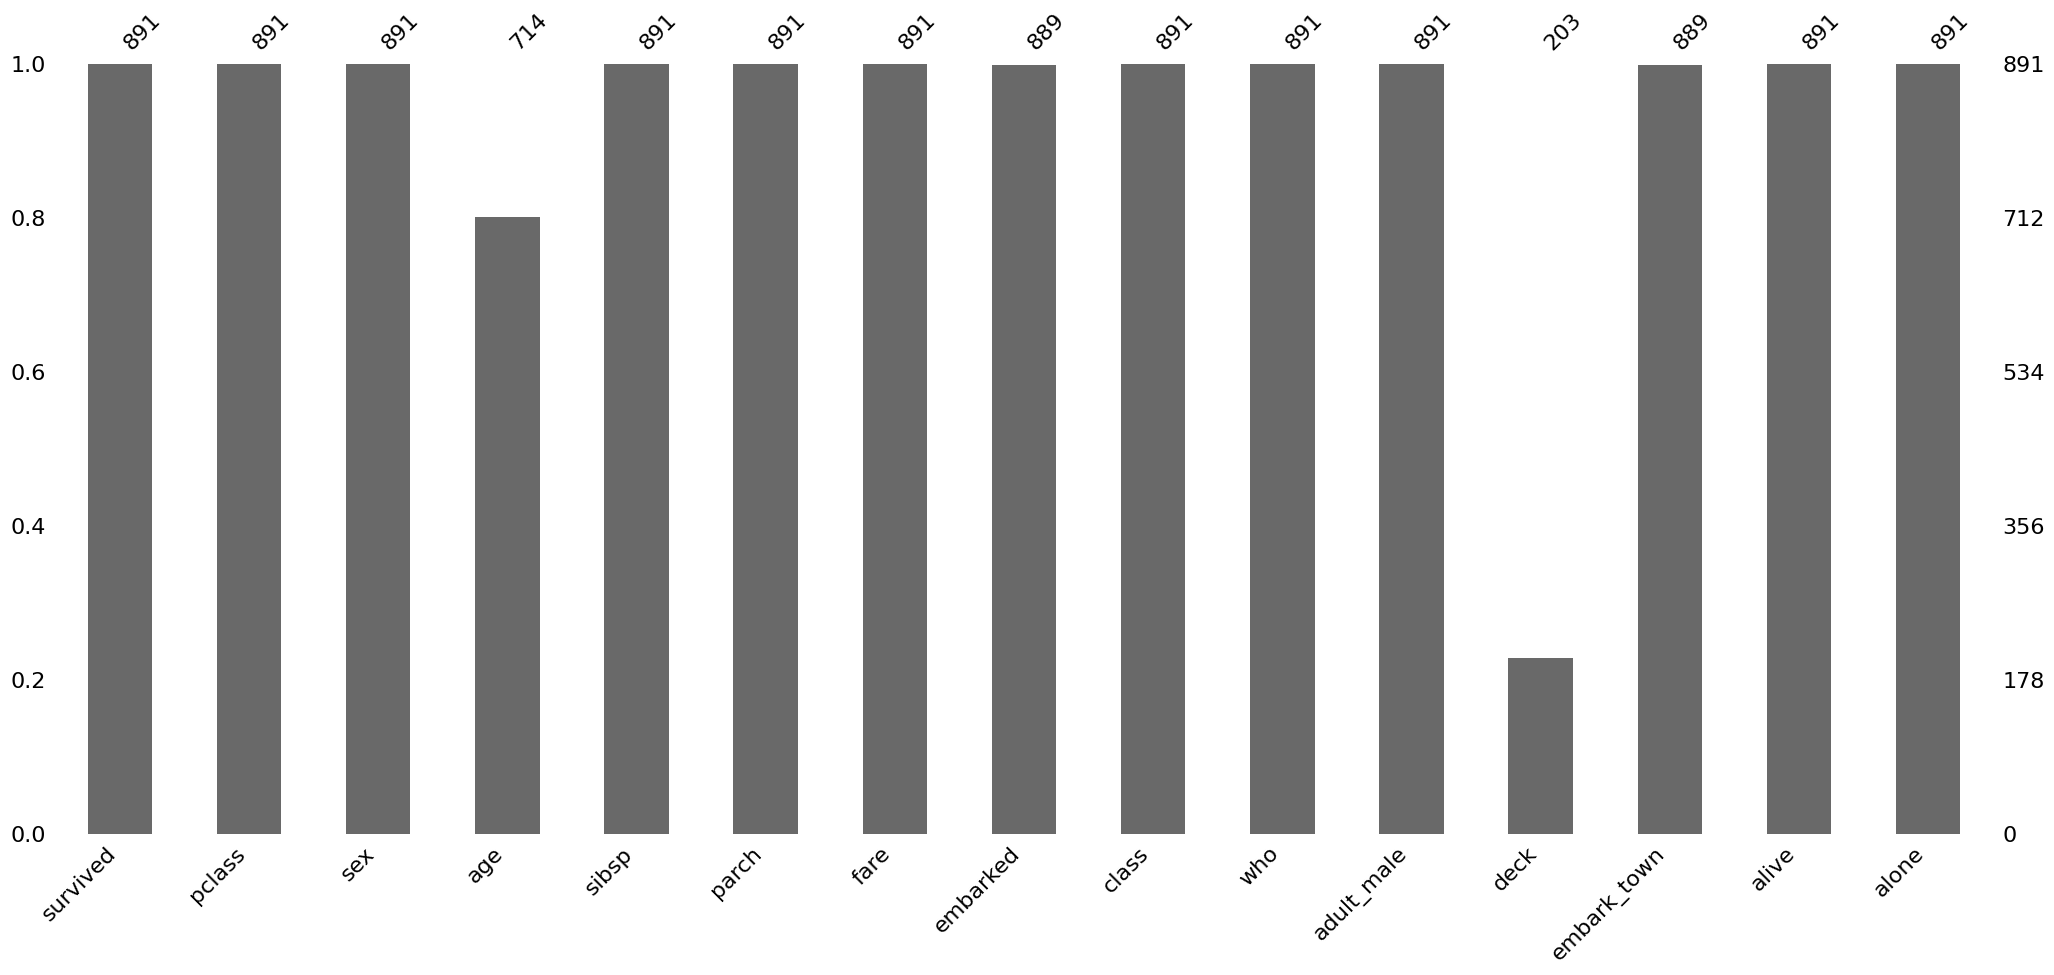

In [6]:
msno.bar(df)

### 환경구성

#### 설치 라이브러리
```python
!pip install opencv-python

#### 가상환경
``` python
conda create -n proj python=3.11 jupyter numpy pandas scipy  missingno
python -m ipykernel install --user --name proj --display-name proj

In [7]:
import os
import matplotlib.pyplot as plt
# !pip install opencv-python
import cv2


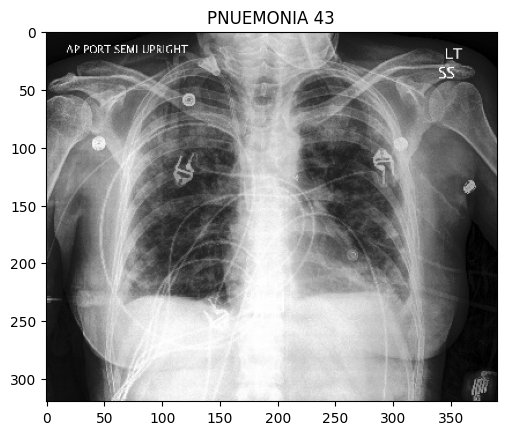

In [8]:
# 데이터 경로 설정
data_dir = "C:/Users/KOREAVC/Downloads/Pnuemonia/Positive"
categories = ['train','test','val'] #  전처리 된 데이터셋을 훈련용, 평가용, 검증용으로 구분

# 샘플 이미지 시각화

img_name = os.listdir(data_dir)[42]
img_path = os.path.join(data_dir,img_name)
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray')
plt.title(f"PNUEMONIA 43")
plt.show()

## Image Resize

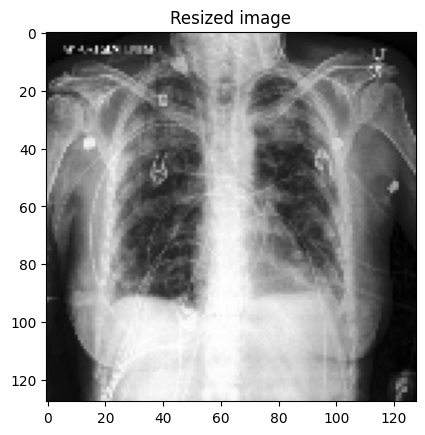

In [9]:
def resize_image(img, size=(128,128)):
    return cv2.resize(img, size)

resized_img = resize_image(img)
plt.imshow(resized_img, cmap='gray')
plt.title('Resized image')
plt.show()

### Histogram Equalization
- image level 평활화

In [10]:
?cv2.equalizeHist

Docstring:
equalizeHist(src[, dst]) -> dst
.   @brief Equalizes the histogram of a grayscale image.
.   
.   The function equalizes the histogram of the input image using the following algorithm:
.   
.   - Calculate the histogram \f$H\f$ for src .
.   - Normalize the histogram so that the sum of histogram bins is 255.
.   - Compute the integral of the histogram:
.   \f[H'_i =  \sum _{0  \le j < i} H(j)\f]
.   - Transform the image using \f$H'\f$ as a look-up table: \f$\texttt{dst}(x,y) = H'(\texttt{src}(x,y))\f$
.   
.   The algorithm normalizes the brightness and increases the contrast of the image.
.   
.   @param src Source 8-bit single channel image.
.   @param dst Destination image of the same size and type as src .
Type:      builtin_function_or_method

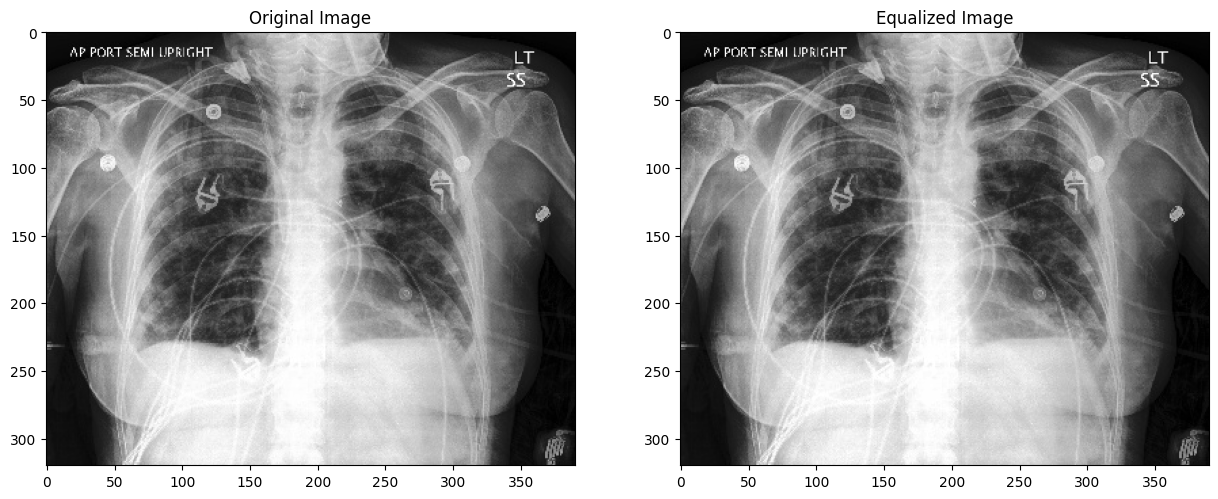

In [11]:
def he_img(img):
    return cv2.equalizeHist(img)

equalized_img = he_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image')
plt.show()

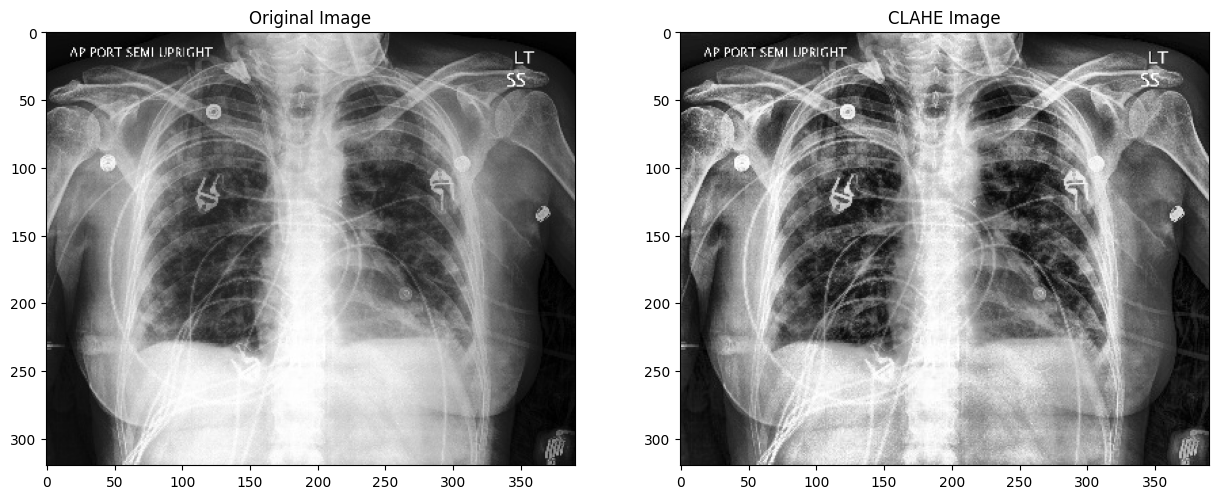

In [12]:
# Histogram Equalization CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe_image(img):
    clahe = cv2.createCLAHE(clipLimit=2.,tileGridSize=(8,8))
    cl_img = clahe.apply(img)
    return cl_img

cl_img=clahe_image(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cl_img, cmap='gray')
plt.title('CLAHE Image')
plt.show()

### Data Augmentation
- 데이터의 수를 증가시켜 학습, 평가용 데이터를 추가 확보
- 데이터의 표본(n수)이 적을 때 주로 사용

In [13]:
# !pip install keras

In [14]:
from tensorflow import keras


### Noise Reduction

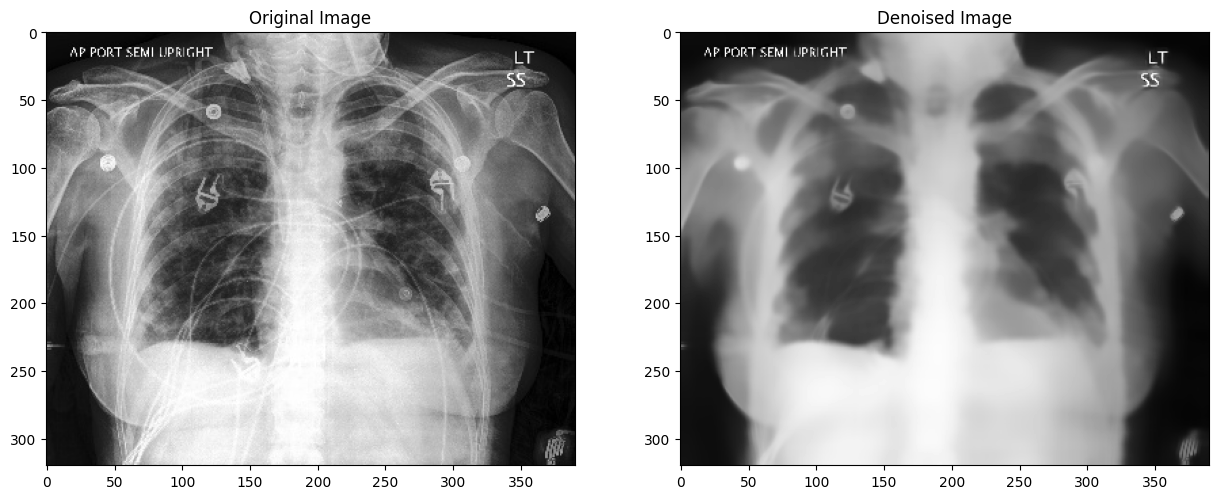

In [15]:
def denoise_img(img):
    return cv2.fastNlMeansDenoising(img,None,30,7,21)

denoised_img = denoise_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(denoised_img, cmap='gray')
plt.title('Denoised Image')
plt.show()

In [16]:
?cv2.fastNlMeansDenoising

Docstring:
fastNlMeansDenoising(src[, dst[, h[, templateWindowSize[, searchWindowSize]]]]) -> dst
.   @brief Perform image denoising using Non-local Means Denoising algorithm
.   <http://www.ipol.im/pub/algo/bcm_non_local_means_denoising/> with several computational
.   optimizations. Noise expected to be a gaussian white noise
.   
.   @param src Input 8-bit 1-channel, 2-channel, 3-channel or 4-channel image.
.   @param dst Output image with the same size and type as src .
.   @param templateWindowSize Size in pixels of the template patch that is used to compute weights.
.   Should be odd. Recommended value 7 pixels
.   @param searchWindowSize Size in pixels of the window that is used to compute weighted average for
.   given pixel. Should be odd. Affect performance linearly: greater searchWindowsSize - greater
.   denoising time. Recommended value 21 pixels
.   @param h Parameter regulating filter strength. Big h value perfectly removes noise but also
.   removes image details, small

### Image Normalization
- 데이터 정규화 처리
- 연산 효율 높이고 정규성을 생성

In [17]:
?cv2.normalize

Docstring:
normalize(src, dst[, alpha[, beta[, norm_type[, dtype[, mask]]]]]) -> dst
.   @brief Normalizes the norm or value range of an array.
.   
.   The function cv::normalize normalizes scale and shift the input array elements so that
.   \f[\| \texttt{dst} \| _{L_p}= \texttt{alpha}\f]
.   (where p=Inf, 1 or 2) when normType=NORM_INF, NORM_L1, or NORM_L2, respectively; or so that
.   \f[\min _I  \texttt{dst} (I)= \texttt{alpha} , \, \, \max _I  \texttt{dst} (I)= \texttt{beta}\f]
.   
.   when normType=NORM_MINMAX (for dense arrays only). The optional mask specifies a sub-array to be
.   normalized. This means that the norm or min-n-max are calculated over the sub-array, and then this
.   sub-array is modified to be normalized. If you want to only use the mask to calculate the norm or
.   min-max but modify the whole array, you can use norm and Mat::convertTo.
.   
.   In case of sparse matrices, only the non-zero values are analyzed and transformed. Because of this,
.   the range 

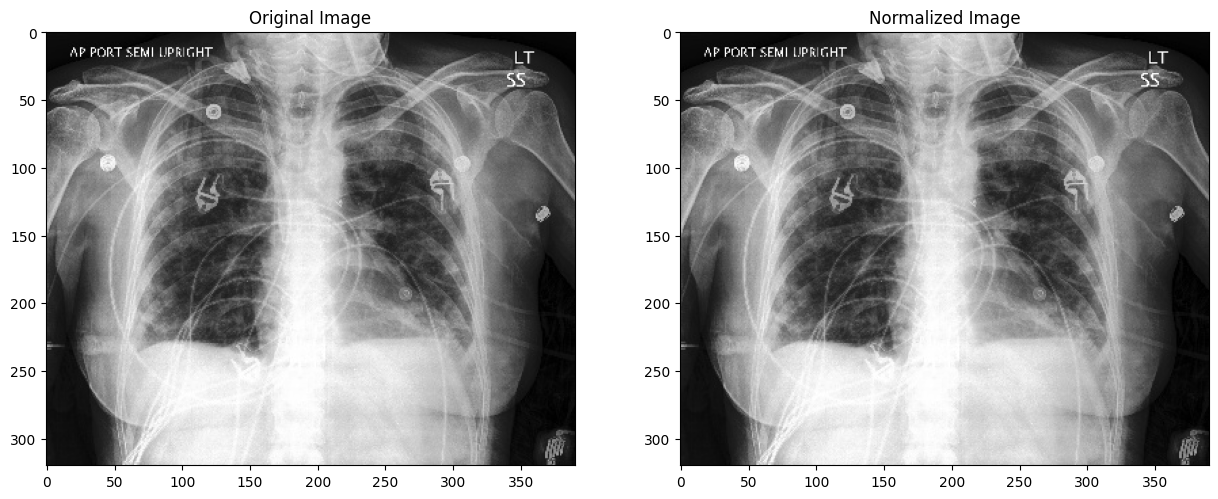

In [18]:
def normalize_img(img):
    return cv2.normalize(img,None,0,255,cv2.NORM_MINMAX)

normalized_img = normalize_img(img)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(normalized_img, cmap='gray')
plt.title('Normalized Image')
plt.show()

### Edge Detection

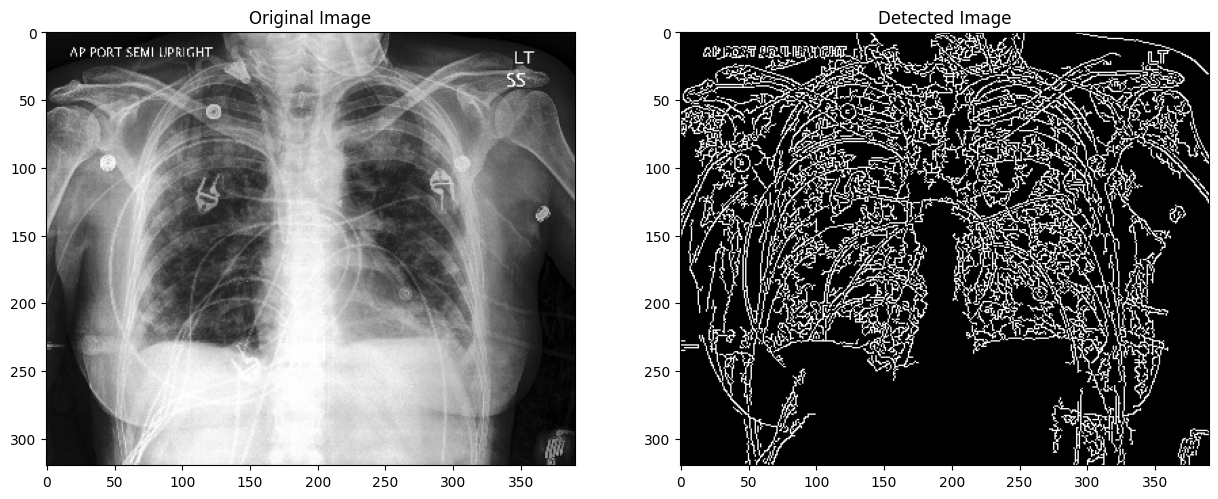

In [19]:
def detect_edge(img):
    return cv2.Canny(img,30,200) 

detected_img = detect_edge(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(detected_img, cmap='gray')
plt.title('Detected Image')
plt.show()

### Blurring

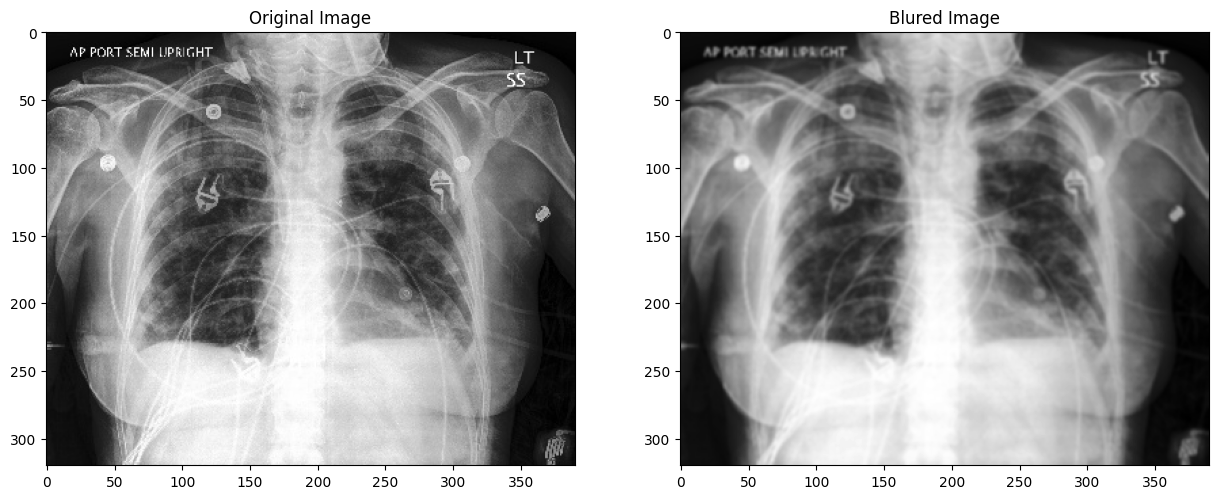

In [20]:
def blur_img(img):
    return cv2.GaussianBlur(img, (5,5),0)

blured_img = blur_img(img)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(blured_img, cmap='gray')
plt.title('Blured Image')
plt.show()

### Contour Detection

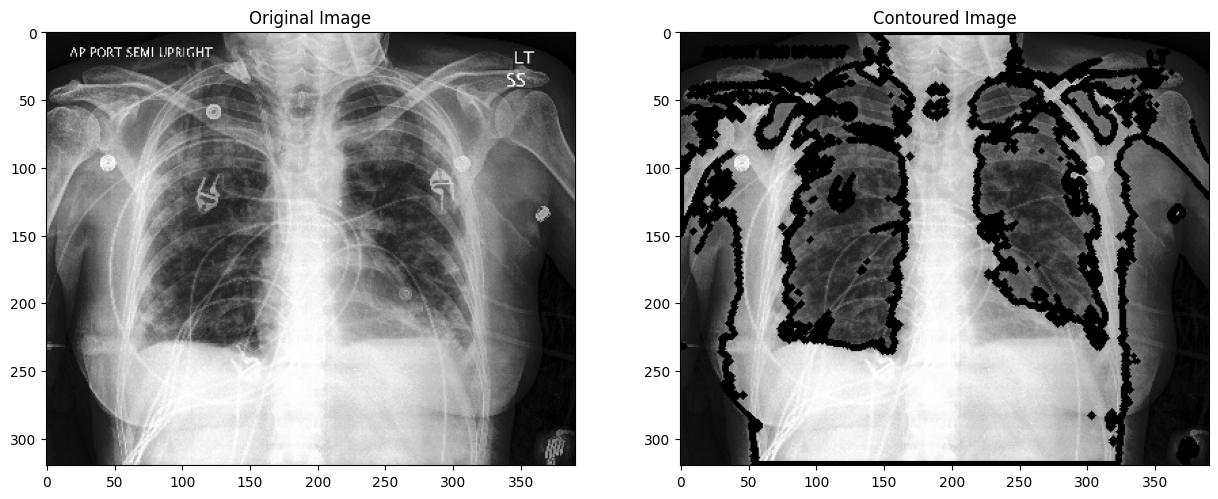

In [21]:
def find_contour(img):
    ret, thresh = cv2.threshold(img,127,255,0)
    contours,hiearchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    return contours

contours = find_contour(img)
contour_img = cv2.drawContours(img.copy(),contours,-1,(0,255,0),3)

plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(contour_img, cmap='gray')
plt.title('Contoured Image')
plt.show()


### Data Preparing

In [22]:
def load_data(data_dir):
    images = []
    labels = []
    for img_path in os.listdir(data_dir):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = resize_image(img)
        img = clahe_image(img)
        img = normalize_img(img)
        images.append(img)
    
    prepared_datas = np.array(images)
    return prepared_datas


print(load_data(data_dir))

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


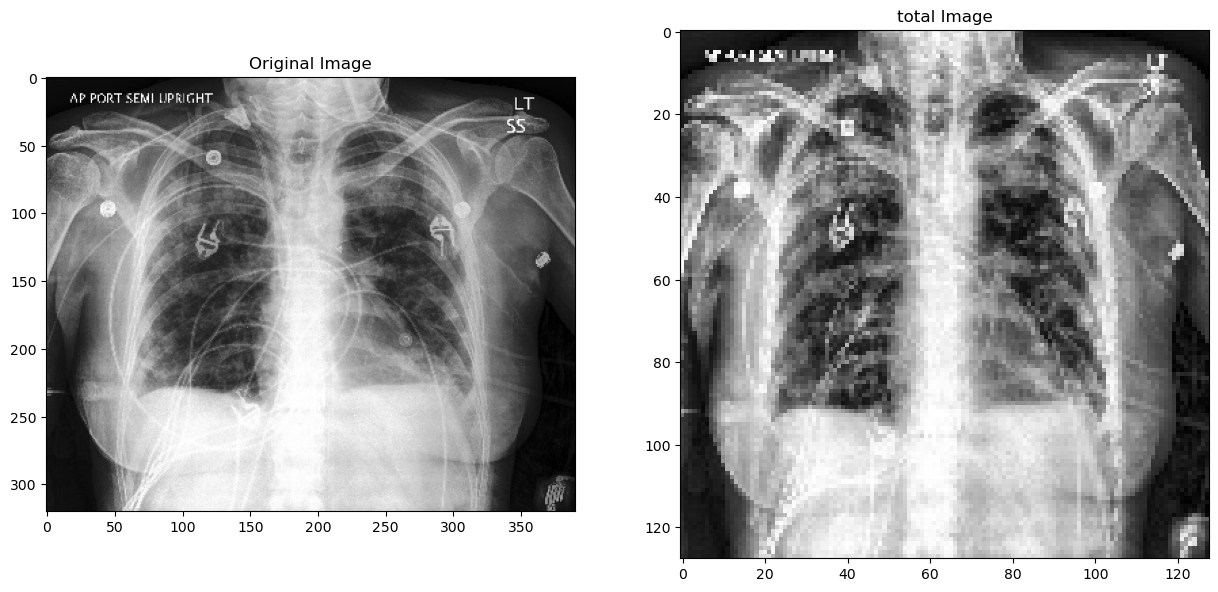

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
img = resize_image(img)
img = clahe_image(img)
img = normalize_img(img)


plt.subplot(1, 2, 2)
plt.imshow(img, cmap='gray')
plt.title('total Image')
plt.show()

In [ ]:
%whos
# %reset > 다 날아감
# %pwd > 작업폴더
# %ls > 작업 폴더내 파일

Variable         Type         Data/Info
---------------------------------------
blur_img         function     <function blur_img at 0x0000026C08D1DB20>
blured_img       ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
categories       list         n=3
cl_img           ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
clahe            CLAHE        < cv2.CLAHE 0000026C6DEF1D10>
clahe_image      function     <function clahe_image at 0x0000026C7E147240>
contour_img      ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
contours         tuple        n=615
cv2              module       <module 'cv2' from 'c:\\U<...>kages\\cv2\\__init__.py'>
data_dir         str          C:/Users/KOREAVC/Downloads/Pnuemonia/Positive
denoise_img      function     <function denoise_img at 0x0000026C0318C7C0>
denoised_img     ndarray      320x390: 124800 elems, type `uint8`, 124800 bytes (121.875 kb)
detect_edge      function     <fun

### 단층 퍼셉트론
- 퍼셉트론 : 다수의 신호를 입력받아 하나의 신호를 출력
- 입력 신호(x1,x2), 출력신호(y), 가중치 (w1,w2)로 구성
- 가중합 (weighted sum)이 임계치를 넘어야 출력

In [28]:
import numpy as np
x = np.array([0,1])
w = np.array([0.5,0.5])
b = -.7

np.sum(w*x)+b


-0.19999999999999996

### 활성화 함수 - Activation Function
- sigmoid
- ReLU
- 비선형성 생성

In [35]:
# custom - 계산을 안정적으로
def sigmoid(x):
    pos_mask = (x>=0)
    neg_mask = (x<0)
    z = np.zeros_like(x)  # 입력값과 같은 크기의 배열을 0으로 생성
    z[pos_mask] = np.exp(-x[pos_mask])
    z[neg_mask] = np.exp(x[neg_mask])
    top = np.ones_like(x)
    top[neg_mask] = z[neg_mask]  # 입력 값이 0보다 작은 경우 분자를 exp(x) 설정
    return top / (1+z)

In [36]:
# ReLU
def relu(x):
    return np.maximum(0,x)

In [39]:
x = np.array([-1.,1.,3.])
sigmoid(x)

array([0.26894142, 0.73105858, 0.95257413])

In [40]:
relu(x)

array([0., 1., 3.])

###다층 퍼셉트론

In [41]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1,0.3,0.5],[0.2,.4,.6]])
    network['b1'] = np.array([.1,.2,.3])
    network['W2'] = np.array([[0.1,0.4],[.2,.5],[.3,.6]])
    network['b2'] = np.array([.1,.2])
    network['W3'] = np.array([[0.1,0.3],[.2,.4]])
    network['b3'] = np.array([.1,.2])
    
    return network

def identify_function(x):
    return x

def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identify_function(a3)
    
    return y

# 실행
network = init_network()
x = np.array([1.,-1.])
y = forward(network, x)
y


array([0.30625898, 0.67286499])

In [49]:
# softmax
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x-c)
    sum_exp_x = np.sum(exp_x)
    y = exp_x / sum_exp_x
    return y

In [ ]:
# class :
#     def __init__():
        
#     def __del__():

## pneumonia 예제


In [43]:
!git clone https://github.com/anantSinghCross/xray_classification_pneumonia.git

Cloning into 'xray_classification_pneumonia'...
Updating files:  66% (3883/5846)
Updating files:  67% (3917/5846)
Updating files:  68% (3976/5846)
Updating files:  69% (4034/5846)
Updating files:  70% (4093/5846)
Updating files:  71% (4151/5846)
Updating files:  72% (4210/5846)
Updating files:  73% (4268/5846)
Updating files:  74% (4327/5846)
Updating files:  75% (4385/5846)
Updating files:  76% (4443/5846)
Updating files:  77% (4502/5846)
Updating files:  78% (4560/5846)
Updating files:  79% (4619/5846)
Updating files:  80% (4677/5846)
Updating files:  81% (4736/5846)
Updating files:  82% (4794/5846)
Updating files:  83% (4853/5846)
Updating files:  84% (4911/5846)
Updating files:  85% (4970/5846)
Updating files:  86% (5028/5846)
Updating files:  87% (5087/5846)
Updating files:  88% (5145/5846)
Updating files:  89% (5203/5846)
Updating files:  90% (5262/5846)
Updating files:  91% (5320/5846)
Updating files:  92% (5379/5846)
Updating files:  93% (5437/5846)
Updating files:  94% (5496/5

In [44]:
import glob
base_path = './xray_classification_pneumonia/Dataset_compressed/train'
file_path = list(glob.glob(base_path + "/*/*.*"))
pneumonia = list(glob.glob(base_path+"/PNEUMONIA/*.*"))
normal = list(glob.glob(base_path+"/NORMAL/*.*"))

In [45]:
len(pneumonia), len(normal)

(3875, 1341)

In [46]:
import matplotlib.pyplot as plt
import os
test = os.path.dirname(file_path[0])
print(test)
class_name = os.path.split(os.path.dirname(test))
print(class_name)

./xray_classification_pneumonia/Dataset_compressed/train\NORMAL
('./xray_classification_pneumonia/Dataset_compressed', 'train')


In [47]:
# folder name to label
labels = []
for fp in file_path:
    tmp = os.path.dirname(fp)
    class_name = os.path.split(tmp)
    if class_name[1] == "PNEUMONIA":
        labels.append(1)
    else:
        labels.append(0)

In [48]:
import numpy as np
from tensorflow.keras.utils import array_to_img
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import cv2
img_width = 60
img_height = 60
dataset = np.ndarray(shape=(len(file_path), img_height*img_width), dtype=np.float32)
i=0
for _file in file_path:
    img = cv2.imread(_file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (img_width, img_height))
    
    dataset[i] = img_resized.flatten()
    i += 1
    if i % 250 == 0:
        print(f"{i} images to array")
print("Done!")

250 images to array
500 images to array
750 images to array
1000 images to array
1250 images to array
1500 images to array
1750 images to array
2000 images to array
2250 images to array
2500 images to array
2750 images to array
3000 images to array
3250 images to array
3500 images to array
3750 images to array
4000 images to array
4250 images to array
4500 images to array
4750 images to array
5000 images to array
Done!


In [53]:
def init_network():
    network = {}
    network['W1'] = np.random.randn(3600*100).reshape((3600,100))
    network['b1'] = np.random.randn(100)
    network['W2'] = np.random.randn(100*50).reshape((100,50))
    network['b2'] = np.random.randn(50)
    network['W3'] = np.random.randn(50*2).reshape((50,2))
    network['b3'] = np.random.randn(2)
    
    return network

def identify_function(x):
    return x

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y


### Prediction

In [55]:
x, t = dataset, labels
network = init_network()

accuracy_cnt = 0

for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1
    
print('Accuracy: '+str(float(accuracy_cnt/len(x))))
    

Accuracy: 0.7429064417177914
